<h1 style="color:#ffc0cb;font-size:70px;font-family:Georgia;text-align:center;"><strong>Group Assignment</strong></h1>
<h2 style="color:#ffc0cb;font-size:70px;font-family:Georgia;text-align:center;"><strong>Occupancy Estimation</strong></h2>

### <b>Group 10</b>
### <b>Student Name: Nguyen Dang Huynh Chau (s3777214)</b>
### <b>Student Name: Truong Phu Khang ()</b>
### <b>Student Name: </b>

### <b>Course: EEET2485 - Research Method for Engineers</b>
### <b>Lecturer: Dr. Dao Vu Truong Son</b>

<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 📜 Table of Content</strong></h1>

### 1. [Data Preparation](#1)

1.1 [Introduction](#1.1) 

1.2 [Target question for insights](#1.2)

1.3 [Importing Necessary Libraries and datasets](#1.3)

1.4 [Data Retrieving](#1.4)

1.5 [Data information](#1.5)

<br>

### 2. [Data Cleaning](#2)

2.1 [About This Dataset](#2.1)

2.2 [Data preprocessing](#2.2)

> - 2.2.1 [Drop column `ID` and `Insurance`](#2.2.1)
> - 2.2.2 [Rename column `Sepssis`](#2.2.2)  
> - 2.2.3 [Convert `Sepsis` in to binary number](#2.2.3)
> - 2.2.4 [Drop Duplicate](#2.2.4)  
> - 2.2.5 [Convert Data Type](#2.2.5)  

2.3 [Drop column](#2.3)

> - 2.3.1 [Check correllation for dropping](#2.3.1)
> - 2.3.2 [Check missing values for dropping](#2.3.2)  

2.4 [Upper Case the content](#2.4)

2.5 [Extra-whitespaces](#2.5)

2.6 [Descriptive statistics for Central Tendency](#2.6)

> - 2.6.1 [Overview statistics](#2.6.1)
> - 2.6.2 [Domain Knowledge](#2.6.2)  
> - 2.6.3 [Detect Outliers](#2.6.2)  

2.7 [Save The Intermediate Data](#2.8)

<br>

### 3. [Data exploration (EDA)](#3)

3.1 [Overall look on target variable](#3.1)

> - 3.1.1 [Distribution of Sepsis](#3.1.1) 
> - 3.1.2 [Proportion of Sepsis](#3.1.1) 

3.2 [Frequency of each corresponiding Target variable type](#3.2)

> - 3.2.1 [How old are they?](#3.2.1) 
> - 3.2.2 [How much they weight?](#3.2.2) 
> - 3.2.3 [How high PL (Blood Work Result-1 (mu U/ml)) that the Sepsis is likely to get?](#3.2.3) 
> - 3.2.4 [How high PR ((Blood Pressure (mm Hg)) that the Sepsis is likely to get?](#3.2.4) 
> - 3.2.5 [How high SK (Blood Work Result-2 (mm) that the Sepsis is likely to get?](#3.2.5) 
> - 3.2.6 [How high TS (Blood Work Result-3 (mu U/ml)) that the Sepsis is likely to get?](#3.2.6) 
> - 3.2.7 [How high BD2 (Blood Work Result-4 (mu U/ml)) that the Sepsis is likely to get?](#3.2.7) 
> - 3.2.8 [How high BD2 (Blood Work Result-4 (mu U/ml)) that the Sepsis is likely to get?](#3.2.8) 
> - 3.2.9 [Scatter matrix](#3.2.8) 

3.3 [Statistical Test for Correlation](#3.3)

3.4 [Summary](#3.3)

<br>

### 4. [Feature Engineering](#4)

4.1 [Class Imbalancing](#4.1)

4.2 [Splitting the training data](#4.2)

4.3 [Feature Scaling](#4.3)



<br>

### 5. [Model Building](#5) 

5.1 [Logistic Regression](#5.1)

> - 5.1.1 [Train Model](#5.1.1)
> - 5.1.2 [Model Evaluation](#5.1.2)
> - 5.1.3 [Hypertuning parameter](#5.1.3)
> - 5.1.4 [Retrain](#5.1.4)
> - 5.1.5 [Conclusion](#5.1.5)

5.2 [Decision Tree](#5.2)

> - 5.2.1 [Train Model](#5.2.1)
> - 5.2.2 [Hypertuning & Pruning](#5.2.2)

> - 5.2.2.a [Post-Pruning](#5.2.2.a)
> - 5.2.2.b [Pre-Pruning](#5.2.2.b)
> - 5.2.2.c [Hypertuning parameter](#5.2.2.c)

> - 5.2.3 [Hypertuning parameter](#5.2.3)
> - 5.2.4 [Conclusion](#5.2.3)

5.3 [Random Forest](#5.3)

> - 5.3.1 [Train Model](#5.3.1)
> - 5.3.2 [Model Evaluation](#5.3.2)
> - 5.3.3 [Hypertuning parameter](#5.3.3)
> - 5.3.4 [Retrain](#5.3.4)
> - 5.3.5 [Conclusion](#5.3.5)

<br>

### 6. [Conculsions](#5)

<br>

### 7. [References](#7)

<br>

### 8. [Appendix](#8)

<hr>

<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> ✍️ 1. Data Preparation</strong></h1>

<a id="1.1"></a>
# ️🎯 1.1 Introduction
****

<p style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black"> In this modern world, technology play an important role in making any objects to be smarter. In this project, our group will analysis a system called Room Occupancy Estimation. This system will create a standard for smart building in near future. This system will assist building managers or hotel managers to acknowledge number of rooms being used at the moment and number of rooms is currently empty. By using multiple sensors like temperature, lights, sound, CO2. With multiple devices being used in this system, IoT will be employed and most importantly, all these devices must be energy efficient and low cost. Therefore, these devices will need to be saving energy for less battery consuming. Moreover, our group is going to analyst data in this project, to see efficintcy of the system .</p>

## 📣 What will you get after this notebook?

<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>Factors that reflect </li>
</ul>

<a id="1.2"></a>
# ️🎯 1.2 Target question for insights
****
<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>Which <span style="color:#122ecc;">Time </span> the <span style="color:#122ecc;">temperature, light, sound, CO2 and digital passive infrared (PIR) </span> reach the highest values?</li>

</ul>

<a id="1.3"></a>
# ✴️ 1.3 Importing Necessary Libraries and datasets
****

In [1]:
import sys
!{sys.executable} -m pip -q install missingno
!{sys.executable} -m pip -q install graphviz
!{sys.executable} -m pip -q install researchpy
!{sys.executable} -m pip -q install imbalanced-learn

# import libraries which are pandas and numpy
import pandas as pd
import numpy as np
import missingno as msno


#for plots
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]= 20,15

#Libraries for plotting
# Modules for data visualization
import seaborn as sns
import matplotlib.patches as mpatches
sns.set_theme(style="ticks", color_codes=True) #set theme in seaborn
# scatter matrix library
from pandas.plotting import scatter_matrix

## Check numpy and pandas version

In [2]:
# check the version of the packages
print("Numpy version: ", np.__version__)
print("Pandas version: ",pd.__version__)
! python --version

Numpy version:  1.22.3
Pandas version:  1.3.4
Python 3.9.7


### ------------> OBSERVATION
***
I want to check the numpy and pandas version since I want to make sure the verson is appropriate for my work load. Currently, it is still appropriate

<a id="1.4"></a>
# 📲 1.4 Data Retrieving
***


In [3]:
df = pd.read_csv("Data/Occupancy_Estimation.csv", delimiter=',', skipinitialspace = True)

df.columns = df.columns.str.replace(' ', '') #strip the extra-whitespaces out

print("The shape of the ORGINAL data is (row, column):", str(df.shape))

# drop Unnamed, it is just a number given to identify each house
df.head(3)

The shape of the ORGINAL data is (row, column): (10129, 19)


,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1


<a id="1.5"></a>
# 🔈 1.5 Data Information
****
I want to have an overall look on both of the train and test dataset, so I use .shape and .info() function in python to do that.

In [4]:
print ("The shape of the train data is (row, column):"+ str(df.shape))
print (df.info())

The shape of the train data is (row, column):(10129, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2       

### ------------> OBSERVATION
***
From this, the information that I gained from the train dataset are the total record is 10129 with no missing and it has 19 columns with the target variable `Room_Occupancy_Count.

<a id="2"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 🧹 2. Data Cleaning</strong></h1>

<a id="2.1"></a>
# 🦄 2.1 About This Dataset
***
Let's investigate the datatype of the dataset a little bit.
***
**Categorical:** 
            
- **Ordinal** (just like nominal datatype but can be ordered or ranked)
> - **Date** YYYY/MM/DD: the date of the experiment
> - **Time**: the time of the experiment
> - **Room_Occupancy_Count**: Ground Truth

***
**Numeric:**
- **Discrete**
>  - **pctid** : Cooler Fan RPM Speed Percentage ID (20 means 20%, and so on).
  
- **Continous**
    >  - **S1_Temp**: Sensor nodes 1 temperature
    >  - **S2_Temp**: Sensor nodes 2 temperature
    >  - **S3_Temp**: Sensor nodes 3 temperature
    >  - **S4_Temp**: Sensor nodes 4 temperature
    >  - **S1_Temp**: Sensor nodes 1 temperature
    >  - **S1_Light**: Sensor nodes 1 light
    >  - **S2_Light**: Sensor nodes 2 light
    >  - **S3_Light**: Sensor nodes 3 light
    >  - **S4_Light**: Sensor nodes 4 light
    >  - **S1_Sound**: Sensor nodes 1 sound
    >  - **S2_Sound**: Sensor nodes 2 sound
    >  - **S3_Sound**: Sensor nodes 3 sound
    >  - **S4_Sound**: Sensor nodes 4 sound
    >  - **S5_CO2**: Sensor nodes 5 CO2
    >  - **S5_CO2_Slope**: Sensor nodes 1 temperature
    >  - **S6_PIR**: Sensor nodes 1 temperature
    >  - **S7_PIR**: Sensor nodes 1 temperature

<a id="2.2"></a>
# 🦄 2.2 Drop duplicate
***
Firstly, we want to drop duplicate

In [5]:
print ("The shape of the data set before dropping duplicated:"+ str(df.shape))

df = df.drop_duplicates()

print ("The shape of the data set after dropping duplicated:"+ str(df.shape))

The shape of the data set before dropping duplicated:(10129, 19)
The shape of the data set after dropping duplicated:(10129, 19)


### ------------> OBSERVATION
***
In our data there is no duplicated values.

<a id="3"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 📊 3. Data analyise </strong></h1>

****

<p style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">1. Outliners </p>
<p style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">2. Correlation </p>
<p style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">3. Correlation </p>

<a id="3.1"></a>
# 3.1 Outliers
****
## Detect and Dropping regulation: 
For the outliers, I want to detect them first. There are 2 scenarios which is the percentage of outliers is less than and equal 6 or the outliers is over 6 percent. For the percentage of outliers which is equal or less than 6, I will drop them since it does not effect much to our data, however, if the percentage of outliers is higher than 6 then I will investigate more. In case, all of the outliers have at least 1 person in that room, I do not drop it, since it indicate that in the "extreme" condition, that room have at least one people. In the scenario that there is just about less than 20 percent of the outliers have at least 1 people in the room, then I will drop that outliers since those outliers are just the noise data, which cause bias for the later model. Lastly, if there is more than 60 percent of outliers have at least one people in the room, then I will just drop the noise that do not have anyone in room. 
*****
## Outliers Dealing Method: 
I will deal outliers with box plot and IQR-distance from Median. The Z-Score, Quantile Filter, and IQR-distance from Median are three common methods for dealing with outliers. The Z-Score is used to calculate the mean and standard deviation. As a result, the evaluation of outliers may be skewed. The Quantile Filter is a superior strategy, however it can remove some of the parts that aren't outliers, resulting in a significant quantity of good data being lost while the outliers remain.

The minimum is known as Q0, the lower quartile is known as Q1, the median is known as Q2, the upper quartile is known as Q3, and the maximum is known as Q4. Q1, Q2, and Q3 mean:
> - Q1: greater than one-quarter of the data
> -Q2: greater than two-quarters of the data.
> -Q3: more than three-quarters of the data.

The InterQuatile Range, or IQR, is what is measured when the spread is measured. The IQR shows how evenly distributed the middle half of the data is. As a result of measuring IQR, values that are far from the center are identified and labeled as outliers.)

<a id="3.1.1"></a>
## 3.1.1 Descriptive statistics for Central Tendency

In [6]:
# see the static of all numerical column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S1_Temp,10129.0,25.454012,0.351351,24.940000,25.190000,25.38,25.63,26.380000
S2_Temp,10129.0,25.546059,0.586325,24.750000,25.190000,25.38,25.63,29.000000
S3_Temp,10129.0,25.056621,0.427283,24.440000,24.690000,24.94,25.38,26.190000
S4_Temp,10129.0,25.754125,0.356434,24.940000,25.440000,25.75,26.00,26.560000
S1_Light,10129.0,25.445059,51.011264,0.000000,0.000000,0.00,12.00,165.000000
S2_Light,10129.0,26.016290,67.304170,0.000000,0.000000,0.00,14.00,258.000000
S3_Light,10129.0,34.248494,58.400744,0.000000,0.000000,0.00,50.00,280.000000
S4_Light,10129.0,13.220259,19.602219,0.000000,0.000000,0.00,22.00,74.000000
S1_Sound,10129.0,0.168178,0.316709,0.060000,0.070000,0.08,0.08,3.880000
S2_Sound,10129.0,0.120066,0.266503,0.040000,0.050000,0.05,0.06,3.440000


<AxesSubplot:>

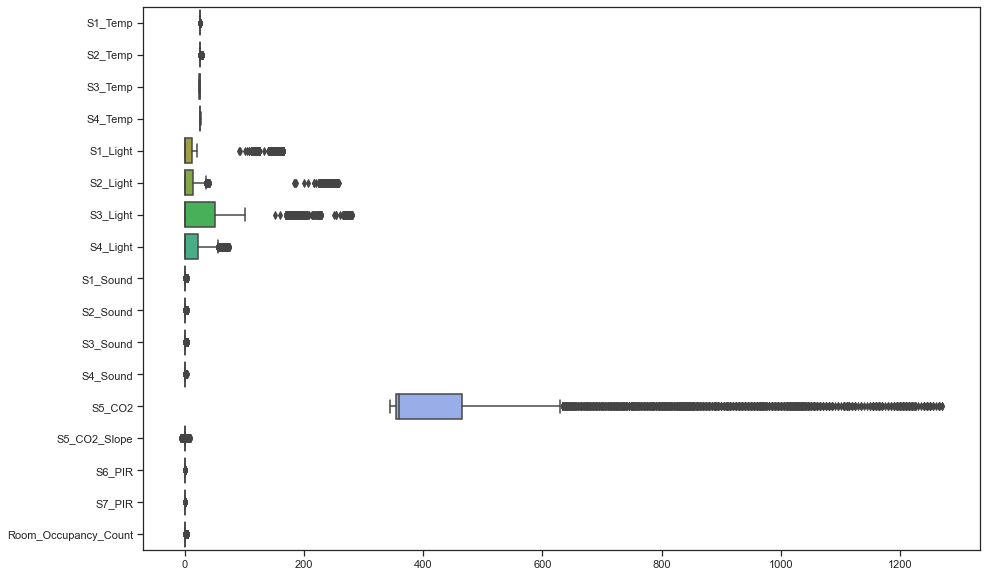

In [7]:
# plot the boxplot to see the outlier of each numerical column
plt.figure(figsize= (15,10))
sns.boxplot(data=df,orient="h")

### ---------> OBSERVATION
> There are some extreme values in `S5_CO2`. I want to explore it first.

## Interquartile Range

In [8]:
# calculate the q1 and q3 and then the iqr
q1_S5_CO2 = df['S5_CO2'].quantile(.25)
q3_S5_CO2 = df['S5_CO2'].quantile(.75)
iqr_S5_CO2 = q3_S5_CO2 - q1_S5_CO2

print("q1_S5_CO2:", q1_S5_CO2, "\n")
print("q3_S5_CO2:", q3_S5_CO2, "\n")
print("iqr_S5_CO2:", iqr_S5_CO2)

q1_S5_CO2: 355.0 

q3_S5_CO2: 465.0 

iqr_S5_CO2: 110.0


## Descriptive statistics for Variability

In [9]:
# look at the price mean
S5_CO2_mean = df['S5_CO2'].mean()
print("S5_CO2_mean:", S5_CO2_mean)
# look at the price median
S5_CO2_median = df['S5_CO2'].median()
print("S5_CO2_median:", S5_CO2_median)
# look at the price mode
S5_CO2_mode = df['S5_CO2'].mode().values[0]
print("S5_CO2_mode:", S5_CO2_mode)

S5_CO2_mean: 460.860400829302
S5_CO2_median: 360.0
S5_CO2_mode: 355


(0.0, 550.0)

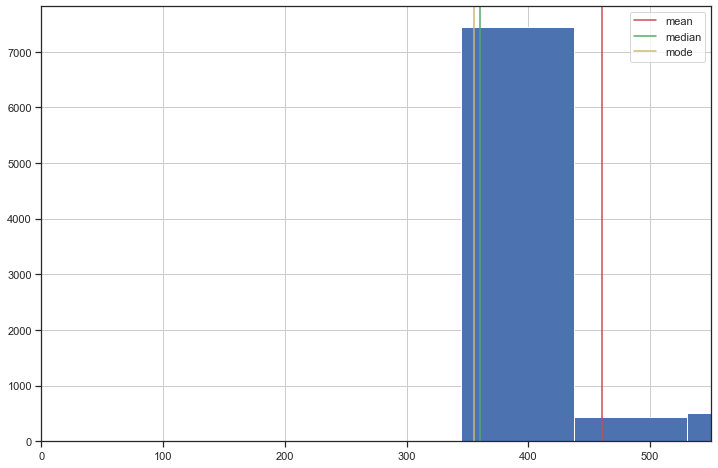

In [10]:
# plot the histogram with mean, median, and mode included
plt.figure(figsize=(12, 8))

df['S5_CO2'].hist()

plt.axvline(S5_CO2_mean, color='r', label='mean')
plt.axvline(S5_CO2_median, color='g', label='median')
plt.axvline(S5_CO2_mode, color='y', label='mode')

plt.legend()

# plt.ylim(0,50000)
plt.xlim(0,550)

### ---------> OBSERVATION
> The mean larger than the median indicates that the data is skewed to the left.

<a id="3.1.2"></a>
## 3.1.2 Apply IQR for detecting outliers

In [11]:
def detect_outliers_IQR(df):
   #Calculate the Q1:
   Q1 = np.percentile(df, 25, method = 'midpoint')
   #Calculate the Q3:
   Q3 = np.percentile(df, 75,method = 'midpoint')
   #Calculate the IQR:
   IQR=Q3-Q1
   # Upper bound
   upper = np.where(df >= (Q3+1.5*IQR))
   # Lower bound
   lower = np.where(df <= (Q1-1.5*IQR))
   #Outliers
   outliers = df[((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
   return outliers, upper, lower

> **`S1_Temp` column**

<AxesSubplot:>

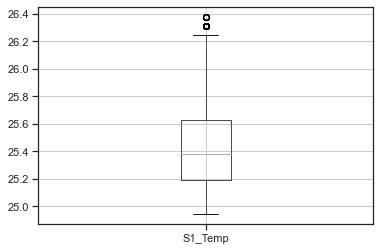

In [12]:
df.boxplot(column= "S1_Temp")

In [13]:
outliers, upper, lower = detect_outliers_IQR(df['S1_Temp'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))


number of outliers: 162
max outlier value: 26.38
min of outliers: 26.31
Percentage of outliers: 1.5993681508539834


### ---------> OBSERVATION
****
The percentage of outliers in `S1_Temp` is extremely small so that I want to replace them with mean, since it is better to develop a machine predicting the casual cases is better than in the extreme condition.

In [14]:
df.drop(upper[0], inplace = True)

> **`S2_Temp` column**

<AxesSubplot:>

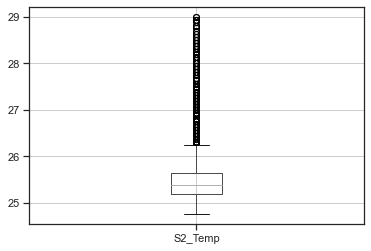

In [15]:
df.boxplot(column= "S2_Temp")

In [16]:
outliers, upper, lower = detect_outliers_IQR(df['S2_Temp'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))

number of outliers: 787
max outlier value: 29.0
min of outliers: 26.31
Percentage of outliers: 7.8960569880606


### ---------> OBSERVATION
****
The number is quite considerable, so I want to query them first.

In [17]:
extreme_temp = df[(df['S2_Temp'] > outliers.min()) & (df['S2_Temp'] < outliers.max())]
extreme_temp.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
129,2017/12/22,11:58:06,25.56,26.38,25.00,25.94,156,243,75,58,0.92,1.27,0.65,0.83,580,2.103846,1,1,2
130,2017/12/22,11:58:37,25.56,26.81,25.00,25.94,155,242,75,57,0.37,1.96,0.98,0.11,580,2.015385,1,1,2
131,2017/12/22,11:59:07,25.56,26.81,25.06,25.88,155,242,75,56,0.55,0.90,0.23,0.32,585,1.973077,1,1,2
132,2017/12/22,11:59:38,25.56,27.00,25.00,25.94,155,238,74,57,0.44,0.60,0.49,0.19,590,1.976923,1,1,2
133,2017/12/22,12:00:09,25.56,26.94,25.06,26.00,155,243,73,56,0.43,1.03,0.22,0.15,585,1.934615,1,1,2


In [18]:
occ_not_0 = extreme_temp[extreme_temp['Room_Occupancy_Count'] > 0]
print(len(occ_not_0)/len(extreme_temp) * 100)

69.35028248587571


### ---------> OBSERVATION
****
Most of the extreme temperature in the `S2_temp` have more than 1 people in the room so I want to drop in some cases that do not have people in room.

In [19]:
df.loc[(df['S2_Temp'] > outliers.min()) & (df['S2_Temp'] < outliers.max()) & (df['Room_Occupancy_Count'] < 1), 'S2_Temp'] = df['S2_Temp'].mean() 


> **`S3_Temp` column**

<AxesSubplot:>

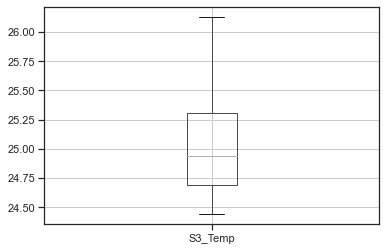

In [20]:
df.boxplot(column= "S3_Temp")

In [21]:
outliers, upper, lower = detect_outliers_IQR(df['S3_Temp'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))

number of outliers: 0
max outlier value: nan
min of outliers: nan
Percentage of outliers: 0.0


### ---------> OBSERVATION
****
There is no outliers.

> **`S4_Temp` column**

<AxesSubplot:>

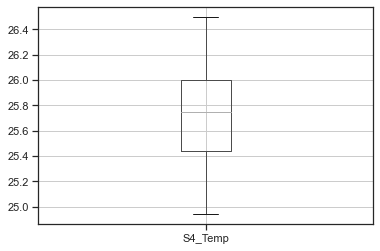

In [22]:
df.boxplot(column= "S4_Temp")

In [23]:
outliers, upper, lower = detect_outliers_IQR(df['S4_Temp'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))

number of outliers: 0
max outlier value: nan
min of outliers: nan
Percentage of outliers: 0.0


### ---------> OBSERVATION
****
There is no outliers.

> **`S1_Light` column**

<AxesSubplot:>

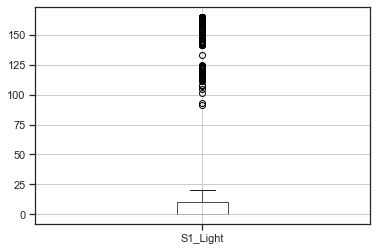

In [24]:
df.boxplot(column= "S1_Light")

In [25]:
outliers, upper, lower = detect_outliers_IQR(df['S1_Light'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))

number of outliers: 1565
max outlier value: 165
min of outliers: 91
Percentage of outliers: 15.701815992776162


### ---------> OBSERVATION
****
The number is quite considerable, so I want to query them first.

In [26]:
extreme_light = df[(df['S1_Light'] > outliers.min()) & (df['S1_Light'] < outliers.max())]
extreme_light.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [27]:
occ_not_0 = extreme_light[extreme_light['Room_Occupancy_Count'] > 0]
print(len(occ_not_0)/len(extreme_light) * 100)

100.0


### ---------> OBSERVATION
****
All of the outliers in the `S1_Light` have at least 1 people in that room, so I do not want to drop them.

> **`S2_Light` column**

<AxesSubplot:>

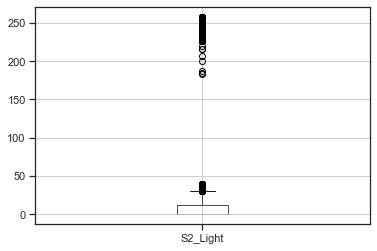

In [28]:
df.boxplot(column= "S2_Light")

In [29]:
outliers, upper, lower = detect_outliers_IQR(df['S2_Light'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))

number of outliers: 997
max outlier value: 258
min of outliers: 31
Percentage of outliers: 10.003009932778168


### ---------> OBSERVATION
****
The number is quite considerable, so I want to query them first.

In [30]:
extreme_light = df[(df['S2_Light'] > outliers.min()) & (df['S2_Light'] < outliers.max())]
extreme_light.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [31]:
occ_not_0 = extreme_light[extreme_light['Room_Occupancy_Count'] > 0]
print(len(occ_not_0)/len(extreme_light) * 100)

100.0


### ---------> OBSERVATION
****
All of the outliers in the `S2_Light` have at least 1 people in that room, so I do not want to drop them.

> **`S3_Light` column**

<AxesSubplot:>

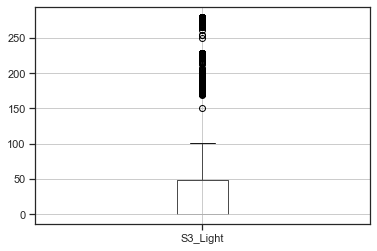

In [32]:
df.boxplot(column= "S3_Light")

In [33]:
outliers, upper, lower = detect_outliers_IQR(df['S3_Light'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))

number of outliers: 798
max outlier value: 280
min of outliers: 151
Percentage of outliers: 8.006421189926758


### ---------> OBSERVATION
****
The number is quite considerable, so I want to query them first.

In [34]:
extreme_light = df[(df['S3_Light'] > outliers.min()) & (df['S3_Light'] < outliers.max())]
extreme_light.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
190,2017/12/22,12:29:46,25.69,28.38,25.19,26.00,155,242,190,60,0.57,0.15,0.77,0.19,645,0.426923,1,0,2
191,2017/12/22,12:30:16,25.69,28.44,25.19,26.00,156,244,190,64,1.12,0.49,0.77,0.25,645,0.411538,1,1,3
192,2017/12/22,12:30:47,25.75,28.56,25.19,26.06,158,245,205,65,0.91,0.29,2.83,0.29,650,0.434615,1,1,3
193,2017/12/22,12:31:17,25.75,28.56,25.25,26.06,159,246,214,66,0.55,0.23,1.01,0.48,645,0.400000,1,1,3
194,2017/12/22,12:31:48,25.75,28.63,25.25,26.06,159,246,220,63,0.58,0.50,3.64,0.62,655,0.400000,1,1,3


In [35]:
occ_not_0 = extreme_light[extreme_light['Room_Occupancy_Count'] > 0]
print(len(occ_not_0)/len(extreme_light) * 100)

100.0


### ---------> OBSERVATION
****
All of the outliers in the `S3_Light` have at least 1 people in that room, so I do not want to drop them.

> **`S4_Light` column**

<AxesSubplot:>

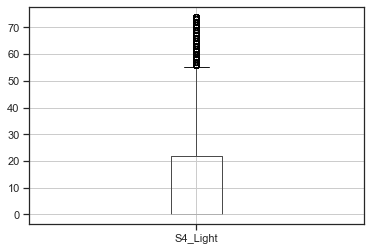

In [36]:
df.boxplot(column= "S4_Light")

In [37]:
outliers, upper, lower = detect_outliers_IQR(df['S4_Light'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))

number of outliers: 543
max outlier value: 74
min of outliers: 56
Percentage of outliers: 5.447978328483997


### ---------> OBSERVATION
****
The number is small, so I want to drop them

In [38]:
df.drop(upper[0], inplace = True)

df.loc[df['S4_Light'] > 50, 'S4_Light'] = np.nan #replace with null
df = df.dropna()


> **`S1_Sound` column**

<AxesSubplot:>

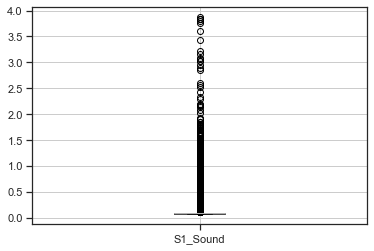

In [39]:
df.boxplot(column= "S1_Sound")

In [40]:
outliers, upper, lower = detect_outliers_IQR(df['S1_Sound'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))

number of outliers: 1096
max outlier value: 3.88
min of outliers: 0.1
Percentage of outliers: 12.266368214885283


### ---------> OBSERVATION
****
The number is quite considerable, so I want to query them first.

In [41]:
extreme_sound = df[(df['S1_Sound'] > outliers.min()) & (df['S1_Sound'] < outliers.max())]
extreme_sound.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40.0,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40.0,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40.0,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40.0,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
5,2017/12/22,10:52:14,25.00,24.81,24.56,25.44,121,34,54,40.0,0.13,0.06,0.06,0.07,390,0.165385,0,0,1


In [42]:
occ_not_0 = extreme_sound[extreme_sound['Room_Occupancy_Count'] > 0]
print(len(occ_not_0)/len(extreme_sound) * 100)

91.22807017543859


### ---------> OBSERVATION
****
Most of the extreme sound cases have the number of people at least 1 so I want to drop only some cases having no people in that room

In [43]:
df.loc[(df['S1_Sound'] > outliers.min()) & (df['S1_Sound'] < outliers.max()) & df['Room_Occupancy_Count'] < 1, 'S1_Sound'] = df['S1_Sound'].mean() 

> **`S2_Sound` column**

<AxesSubplot:>

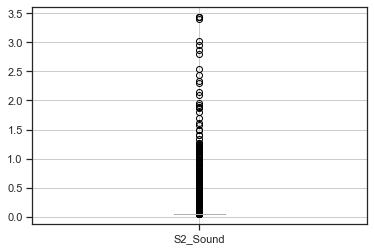

In [44]:
df.boxplot(column= "S2_Sound")

In [45]:
outliers, upper, lower = detect_outliers_IQR(df['S2_Sound'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))

number of outliers: 3447
max outlier value: 3.44
min of outliers: 0.04
Percentage of outliers: 38.57862339115837


### ---------> OBSERVATION
****
The number is quite considerable, so I want to query them first.

In [46]:
extreme_sound = df[(df['S2_Sound'] > outliers.min()) & (df['S2_Sound'] < outliers.max())]
extreme_sound.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40.0,0.129655,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40.0,0.930000,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40.0,0.430000,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40.0,0.410000,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40.0,0.180000,0.06,0.06,0.06,390,0.253846,0,0,1


In [47]:
occ_not_0 = extreme_sound[extreme_sound['Room_Occupancy_Count'] > 0]
print(len(occ_not_0)/len(extreme_sound) * 100)

15.961818904944982


### ---------> OBSERVATION
****
Most of the extreme sound cases have the number of people at least 1 so I want to drop only some cases having no people in that room

In [48]:
df.loc[(df['S2_Sound'] > outliers.min()) & (df['S2_Sound'] < outliers.max()) & df['Room_Occupancy_Count'] < 1, 'S2_Sound'] = df['S2_Sound'].mean() 

> **`S3_Sound` column**

<AxesSubplot:>

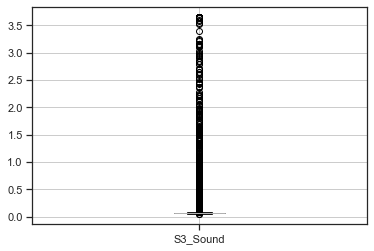

In [49]:
df.boxplot(column= "S3_Sound")

In [50]:
outliers, upper, lower = detect_outliers_IQR(df['S3_Sound'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))

number of outliers: 1021
max outlier value: 3.66
min of outliers: 0.04
Percentage of outliers: 11.426972579742586


### ---------> OBSERVATION
****
The number is quite considerable, so I want to query them first.

In [51]:
extreme_sound = df[(df['S3_Sound'] > outliers.min()) & (df['S3_Sound'] < outliers.max())]
extreme_sound.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40.0,0.129655,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40.0,0.930000,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40.0,0.430000,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40.0,0.410000,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40.0,0.180000,0.06,0.06,0.06,390,0.253846,0,0,1


In [52]:
occ_not_0 = extreme_sound[extreme_sound['Room_Occupancy_Count'] > 0]
print(len(occ_not_0)/len(extreme_sound) * 100)

13.540150072796505


### ---------> OBSERVATION
****
Most of the extreme sound cases have the number of people less than 1 so I want to drop them since the more people in the room the more extreme sound in that rooms have so it is quite not right if I keep those extreme sound and they become noise for the model in the trainnig process.

In [53]:
df.loc[(df['S3_Sound'] > outliers.min()) & (df['S3_Sound'] < outliers.max()), 'S3_Sound'] = df['S3_Sound'].mean() 

> **`S4_Sound` column**

<AxesSubplot:>

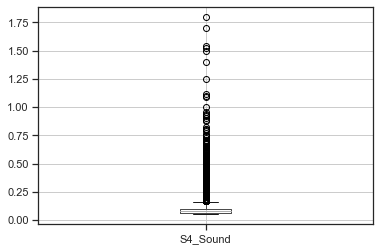

In [54]:
df.boxplot(column= "S4_Sound")

In [55]:
outliers, upper, lower = detect_outliers_IQR(df['S4_Sound'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))

number of outliers: 363
max outlier value: 1.8
min of outliers: 0.17
Percentage of outliers: 4.062674874090655


### ---------> OBSERVATION
****
The number is quite considerable, so I want to query them first.

In [56]:
extreme_sound = df[(df['S4_Sound'] > outliers.min()) & (df['S4_Sound'] < outliers.max())]
extreme_sound.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
9,2017/12/22,10:54:17,25.00,24.81,24.56,25.50,101,34,57,43.0,3.840000,0.64,0.123802,0.39,390,-0.188462,1,1,1
10,2017/12/22,10:54:47,25.06,24.81,24.56,25.44,122,35,57,43.0,2.200000,0.31,0.123802,0.21,390,-0.276923,1,1,1
480,2017/12/22,15:25:55,25.81,25.88,25.69,26.31,112,34,76,49.0,0.900000,0.36,0.123802,0.20,595,-3.526923,0,0,1
489,2017/12/22,15:30:30,25.88,25.88,25.63,26.31,120,34,71,45.0,0.129655,0.05,0.123802,0.21,590,-1.907692,0,0,1
494,2017/12/22,15:33:03,25.94,25.88,25.63,26.31,120,34,70,44.0,1.710000,0.63,0.123802,0.30,580,-1.284615,0,0,1


In [57]:
occ_not_0 = extreme_sound[extreme_sound['Room_Occupancy_Count'] > 0]
print(len(occ_not_0)/len(extreme_sound) * 100)

97.68115942028986


### ---------> OBSERVATION
****
Most of the extreme sound cases have the number of people at least 1 so I want to drop only some cases having no people in that room

In [58]:
df.loc[(df['S4_Sound'] > outliers.min()) & (df['S4_Sound'] < outliers.max()) & df['Room_Occupancy_Count'] < 1, 'S4_Sound'] = df['S4_Sound'].mean() 

> **`S5_CO2` column**

<AxesSubplot:>

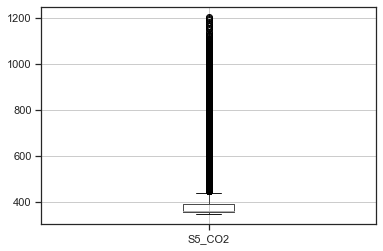

In [59]:
df.boxplot(column= "S5_CO2")

In [60]:
outliers, upper, lower = detect_outliers_IQR(df['S5_CO2'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))

number of outliers: 1984
max outlier value: 1205
min of outliers: 445
Percentage of outliers: 22.20481253497482


### ---------> OBSERVATION
****
The number is quite considerable, so I want to query them first.

In [61]:
extreme_CO2 = df[(df['S5_CO2'] > outliers.min()) & (df['S5_CO2'] < outliers.max())]
extreme_CO2.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
72,2017/12/22,11:26:27,25.31,25.00,24.81,25.75,123,37,64,49.0,0.360000,0.090000,0.123802,0.092685,450,0.984615,1,0,1
73,2017/12/22,11:27:28,25.31,25.25,24.88,25.75,123,31,61,46.0,0.480000,0.310000,0.123802,0.092685,450,1.100000,1,1,1
74,2017/12/22,11:27:59,25.31,25.63,24.81,25.75,124,29,62,46.0,0.510000,0.550000,0.123802,0.092685,450,1.103846,1,1,1
75,2017/12/22,11:28:29,25.38,25.44,24.81,25.69,150,187,63,49.0,0.129655,0.087095,0.123802,0.092685,450,1.088462,1,1,2
76,2017/12/22,11:29:00,25.38,25.44,24.81,25.75,153,216,63,49.0,0.129655,0.087095,0.123802,0.092685,450,1.003846,1,1,2


In [62]:
occ_not_0 = extreme_CO2[extreme_CO2['Room_Occupancy_Count'] > 0]
print(len(occ_not_0)/len(extreme_CO2) * 100)

51.99386503067485


### ---------> OBSERVATION
****
Most of the extreme CO2 cases have the number of people at least 1 so I want to drop only some cases having no people in that room

In [63]:
df.loc[(df['S5_CO2'] > outliers.min()) & (df['S5_CO2'] < outliers.max()) & df['Room_Occupancy_Count'] < 1, 'S5_CO2'] = df['S5_CO2'].mean() 

> **`S5_CO2_Slope` column**

<AxesSubplot:>

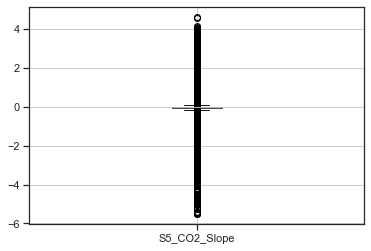

In [64]:
df.boxplot(column= "S5_CO2_Slope")

In [65]:
outliers, upper, lower = detect_outliers_IQR(df['S5_CO2_Slope'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))

number of outliers: 2886
max outlier value: 4.63846153846
min of outliers: -5.53461538462
Percentage of outliers: 32.29994404029099


### ---------> OBSERVATION
****
The number is quite considerable, so I want to query them first.

In [66]:
extreme_CO2 = df[(df['S5_CO2_Slope'] > outliers.min()) & (df['S5_CO2_Slope'] < outliers.max())]
extreme_CO2.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40.0,0.129655,0.19,0.123802,0.092685,439.693341,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40.0,0.930000,0.05,0.123802,0.092685,439.693341,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40.0,0.430000,0.11,0.123802,0.092685,439.693341,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40.0,0.410000,0.10,0.123802,0.092685,439.693341,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40.0,0.180000,0.06,0.123802,0.092685,439.693341,0.253846,0,0,1


In [67]:
occ_not_0 = extreme_CO2[extreme_CO2['Room_Occupancy_Count'] > 0]
print(len(occ_not_0)/len(extreme_CO2) * 100)

13.567670435464011


### ---------> OBSERVATION
****
Most of the extreme CO2 cases do not have the number of people at least 1 so I want to drop only some cases having no people in that room

In [68]:
df = df[df['S5_CO2_Slope'] < 5]

<a id="3.2"></a>
# 3.2 Correlation between columns

/var/folders/l5/0ygc5m0x66xc7d4v2qzjjv0h0000gn/T/ipykernel_99054/2733726890.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)


Text(0.5, 1.03, 'Correlations Among Features')

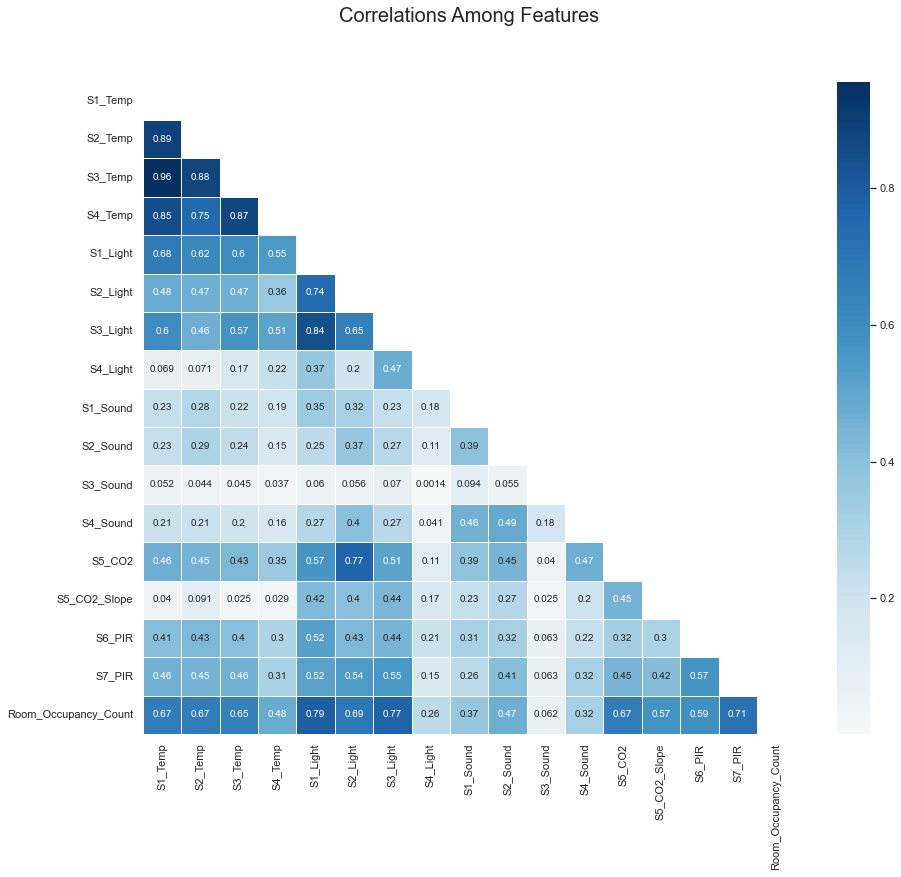

In [69]:
## heatmeap to see the correlation between features. 
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
sns.heatmap(df.corr(), annot=True, mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, linecolor='white', fmt='.2g', center = 0, square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40)

### ------------> OBSERVATION
***
This heat map demonstrates the correlation between columns in the dataset and there is all proportional correlation and no inverse proportional correlation. From this heatmap, there are some insight are gained:
> ***Correlation between columns***: 
>> - ***Correlation between Light***:
>> - ***Correlation between Light***:
>> - ***Correlation between Light***:
>> - ***Correlation between Light***:
>> - ***Correlation between Light***:


> ***Relationship between the Room Occupation and other factors***: 

<a id="3.2.1"></a>
## 3.2.1 Correlation of the temperature sensors

> **`S1_Temp` and `S2_Temp`**

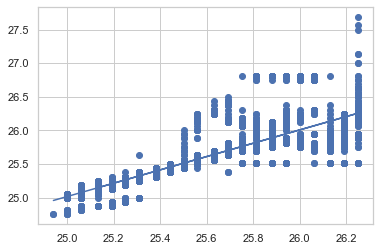

In [70]:
import matplotlib.pyplot as plt
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(df['S1_Temp'], df['S2_Temp'])

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, df['S1_Temp']))

plt.scatter(df['S1_Temp'], df['S2_Temp'])
plt.plot(df['S1_Temp'], mymodel)
plt.show()

In [71]:
r

0.8933510879516449

In [72]:
intercept

0.2657411501789291

In [73]:
slope

0.9900451867539118

In [74]:
p

0.0